# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.head())
print(df_pct_poverty.head())
print(df_pct_completed_hs.head())
print(df_share_race_city.head())
print(df_fatalities.head())

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667
  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
  Geographic area             City share_white share_black  \
0              AL   

In [7]:
print(df_hh_income.isna().sum())
print(df_hh_income.duplicated().any())
print(df_pct_poverty.isna().sum())
print(df_pct_poverty.duplicated().any())
print(df_pct_completed_hs.isna().sum())
print(df_pct_completed_hs.duplicated().any())
print(df_share_race_city.isna().sum())
print(df_share_race_city.duplicated().any())
print(df_fatalities.isna().sum())
print(df_fatalities.duplicated().any())

Geographic Area     0
City                0
Median Income      51
dtype: int64
False
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
False
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
False
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
False
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().any()

,0
Geographic Area,False
City,False
Median Income,False


In [9]:
df_pct_poverty.drop(df_pct_poverty[df_pct_poverty['poverty_rate'] == '-'].index, inplace=True)
df_pct_completed_hs.drop(df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] == '-'].index, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_poverty['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [11]:
mean_poverty_by_state = df_pct_poverty.groupby('Geographic Area').agg(Average_Poverty_PCT = ('poverty_rate', 'mean')).reset_index()
mean_poverty_by_state_sorted = mean_poverty_by_state.sort_values('Average_Poverty_PCT', ascending=False)

fig = px.bar(mean_poverty_by_state_sorted, x='Geographic Area', y='Average_Poverty_PCT')
fig.show()


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
mean_hs_by_state = df_pct_completed_hs.groupby('Geographic Area').agg(Average_HS_PCT=('percent_completed_hs', 'mean')).reset_index()
mean_hs_by_state_sorted = mean_hs_by_state.sort_values('Average_HS_PCT')
px.bar(mean_hs_by_state_sorted, x='Geographic Area', y='Average_HS_PCT')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

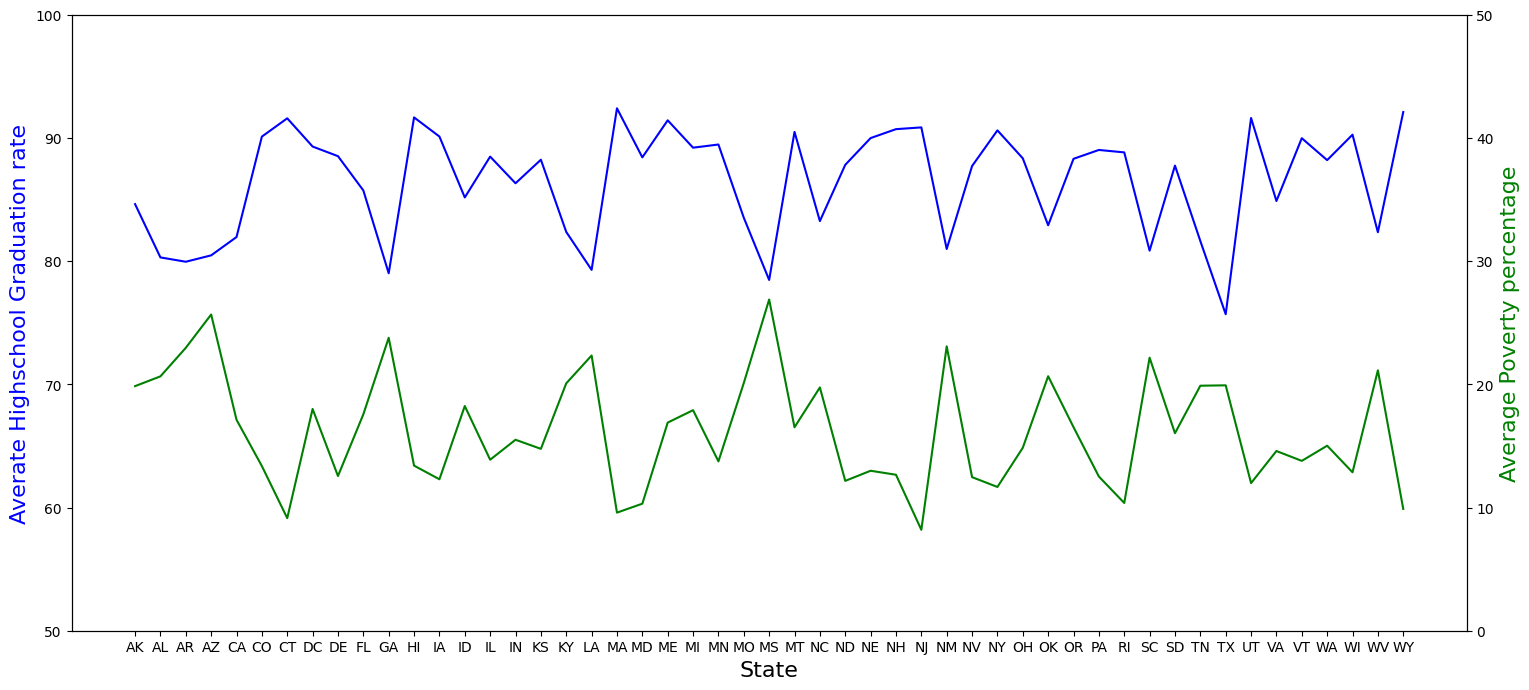

In [13]:
plt.figure(figsize=(18,8))
ax1 = plt.gca()
ax2 = plt.twinx()

ax1.set_ylim(50,100)
ax2.set_ylim(0,50)
ax1.set_xlabel('State', fontsize=16)
ax2.set_ylabel('Average Poverty percentage', color='green', fontsize=16)
ax1.set_ylabel('Averate Highschool Graduation rate', color='blue', fontsize=16)

ax1.plot(mean_hs_by_state['Geographic Area'], mean_hs_by_state['Average_HS_PCT'], color='blue')
ax2.plot(mean_hs_by_state['Geographic Area'], mean_poverty_by_state['Average_Poverty_PCT'], color='green')


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

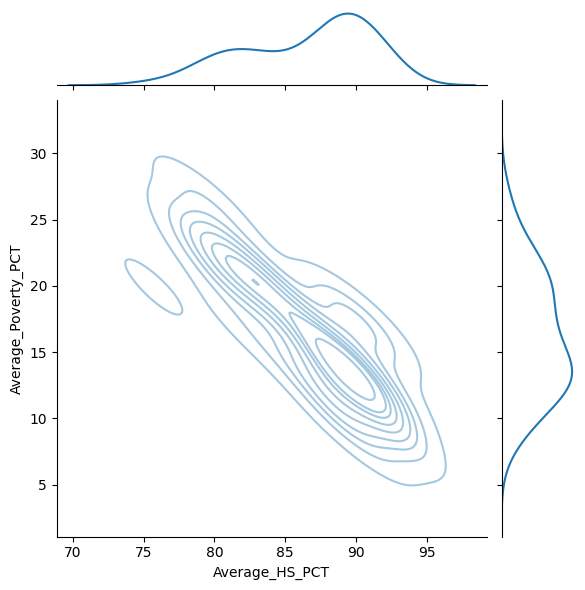

In [14]:
sns.jointplot(x=mean_hs_by_state['Average_HS_PCT'], y=mean_poverty_by_state['Average_Poverty_PCT'], kind='kde', joint_kws={'alpha': 0.4})

In [15]:
merged_hs_poverty = mean_hs_by_state.merge(mean_poverty_by_state, how='inner', on='Geographic Area')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

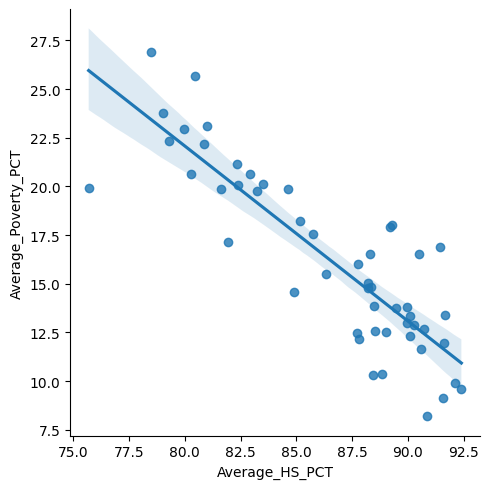

In [16]:
sns.lmplot(data=merged_hs_poverty, x='Average_HS_PCT', y='Average_Poverty_PCT')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [17]:
df_share_race_city.head()
columns = list(df_share_race_city.columns)
for i in columns[2:]:
  df_share_race_city.drop(df_share_race_city[df_share_race_city[i] == '(X)'].index, inplace=True)
  df_share_race_city[i] = pd.to_numeric(df_share_race_city[i])
df_share_race_city_mean = df_share_race_city.drop(columns='City').groupby('Geographic area').mean()

In [18]:
px.bar(df_share_race_city_mean)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [19]:
px.pie(df_fatalities.value_counts('race'), names=df_fatalities.value_counts('race').index, values=df_fatalities.value_counts('race').values, hole=0.6)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [20]:
men_vs_women = df_fatalities.value_counts('gender').reset_index()
px.bar(x=men_vs_women['gender'], y=men_vs_women['count'], color=men_vs_women['gender'])
#

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [21]:
# df_fatalities.groupby('gender')
box_df = df_fatalities.groupby(['gender', 'manner_of_death', 'age']).agg(count=('race','count')).reset_index()

box_df

,gender,manner_of_death,age,count
0,F,shot,12.00,1
1,F,shot,16.00,1
2,F,shot,17.00,3
3,F,shot,18.00,1
4,F,shot,20.00,1
...,...,...,...,...
166,M,shot and Tasered,60.00,1
167,M,shot and Tasered,63.00,3
168,M,shot and Tasered,67.00,1
169,M,shot and Tasered,70.00,1


<Axes: xlabel='manner_of_death', ylabel='age'>

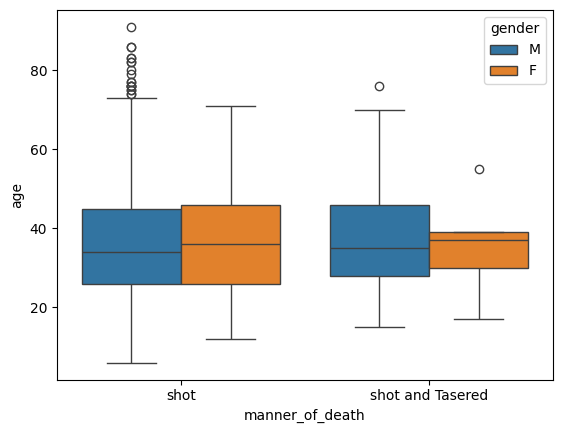

In [22]:
x = np.array([1000,2000])
sns.boxplot(df_fatalities, x='manner_of_death', y='age', hue='gender')
# sns.boxplot(df_fatalities[df_fatalities['gender'] == 'M'], x='manner_of_death', y='age', positions=x)
# sns.boxplot(df_fatalities[df_fatalities['gender'] == 'F'], x='manner_of_death', y='age')

array(['shot', 'shot and Tasered'], dtype=object)

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [34]:
df_weapon = df_fatalities.value_counts('armed').reset_index()
df_weapon[df_weapon['armed'] == 'unarmed']['count']/df_weapon['count'].sum()

,count
3,0.07


In [44]:
df_weapon.sort_values('count', ascending=False, inplace=True)
px.bar(df_weapon[:15], y='armed', x='count', orientation='h')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [55]:
df_fatalities_under25 = df_fatalities[df_fatalities['age'] < 25]
df_fatalities_under25.shape[0]/df_fatalities.shape[0]

0.17751479289940827

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

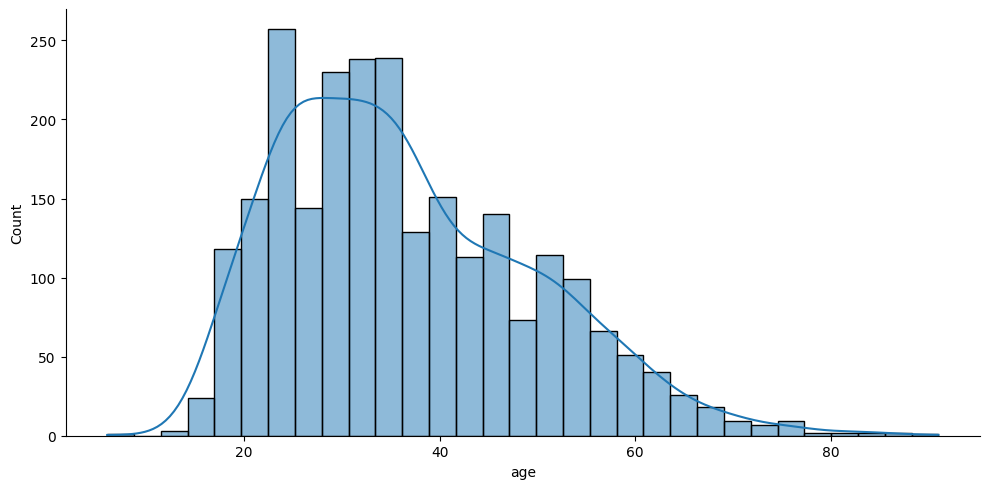

In [59]:
sns.displot(df_fatalities['age'], kde=True, aspect=2)

Create a seperate KDE plot for each race. Is there a difference between the distributions?

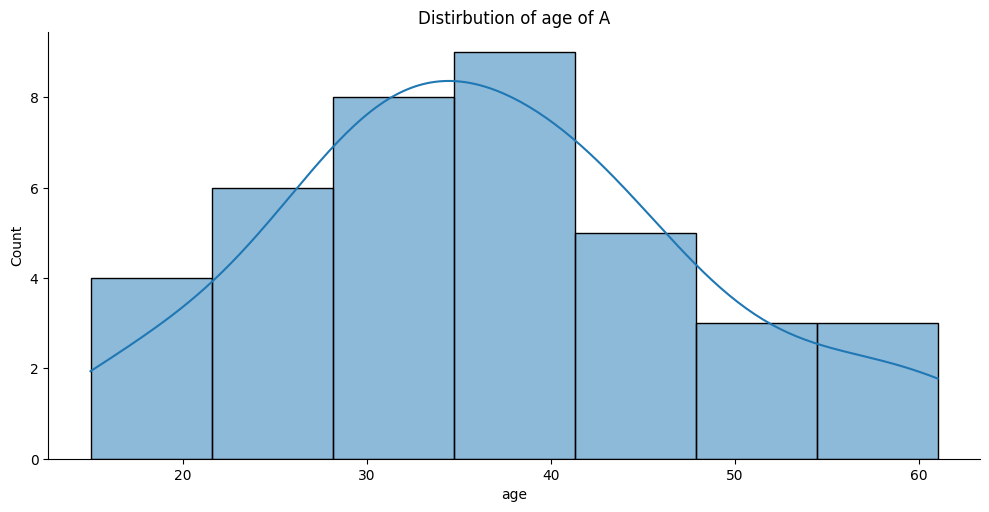

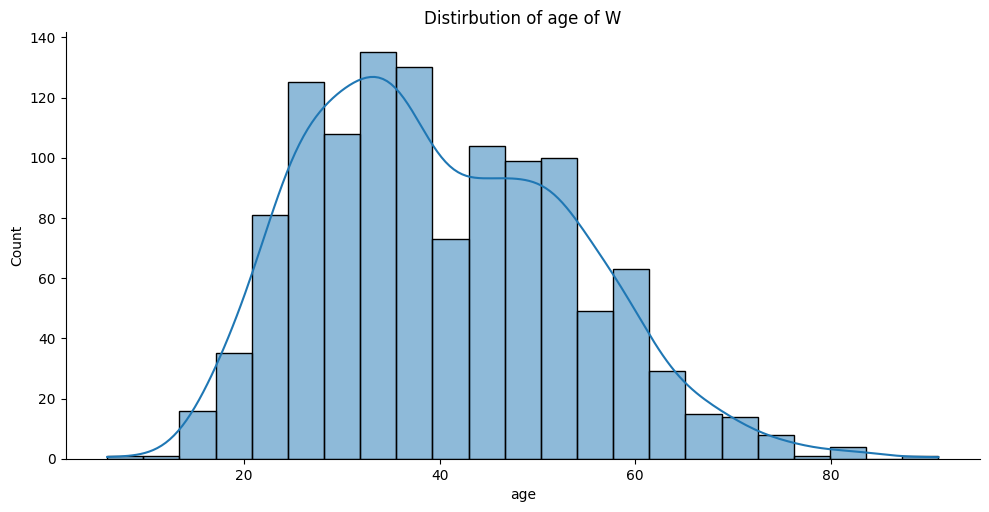

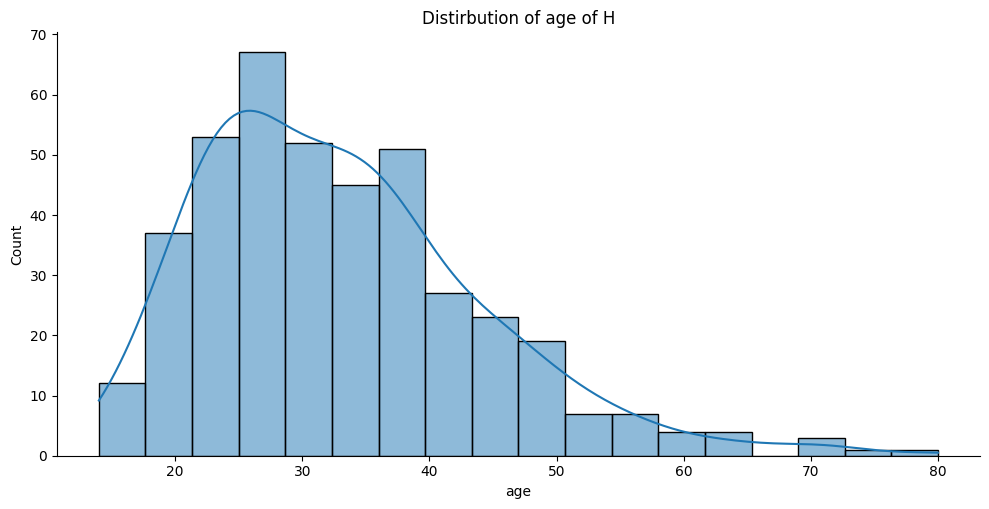

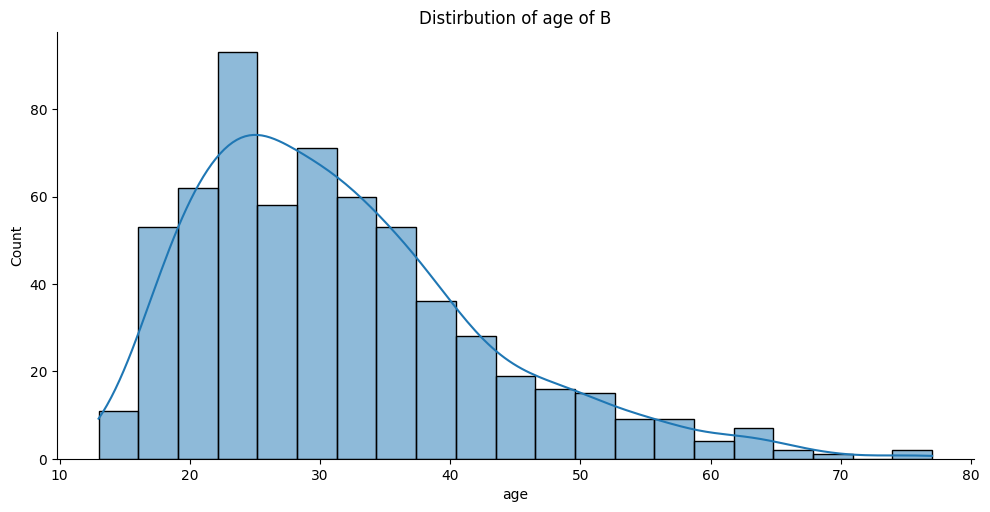

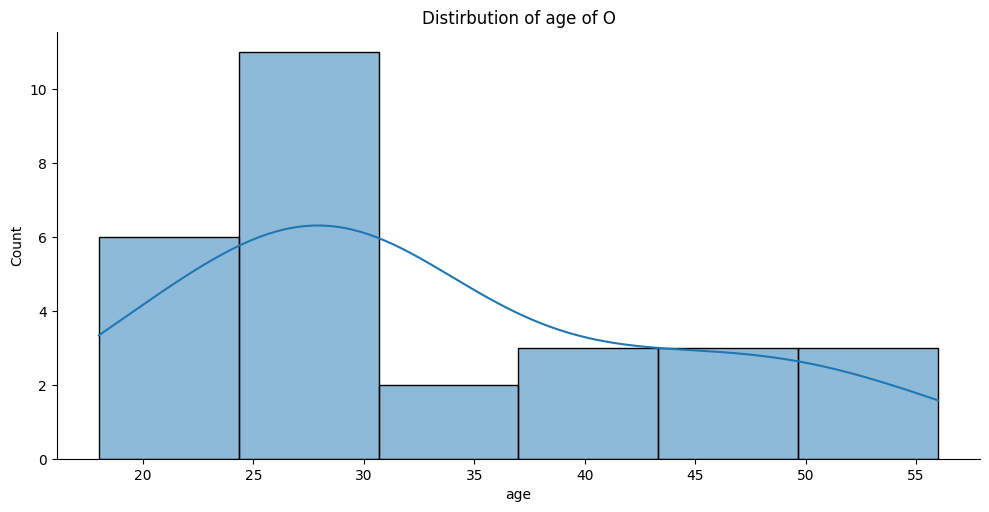

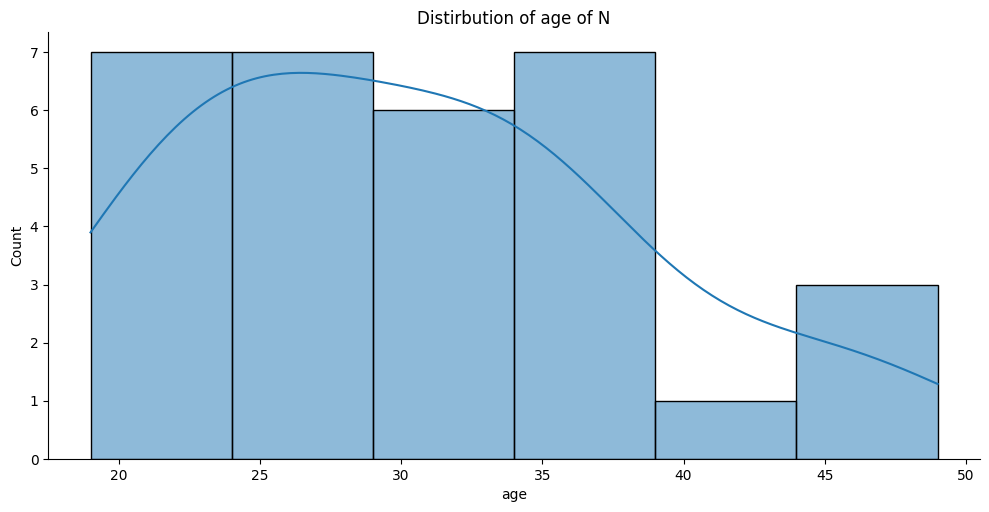

In [77]:
races = list(df_fatalities['race'].unique())
#remove nan
races = [x for x in races if x == x]
for race in races:
  ax = sns.displot(df_fatalities[df_fatalities['race'] == race]['age'], kde=True, aspect=2)
  ax.set(title=f'Distirbution of age of {race}')

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [78]:
#already done earlier...

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [82]:
df_fatalities.value_counts('signs_of_mental_illness')/df_fatalities.shape[0]

,count
signs_of_mental_illness,
False,0.75
True,0.25


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [97]:
df_top_cities = df_fatalities.value_counts('city').sort_values(ascending=False)[:10]
px.bar(df_top_cities)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [145]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [162]:
top_cities = [f'{city} city' for city in list(df_top_cities.index)]
# cities2 = list(df_share_race_city['City'].unique())
# top_cities2 = [city for x in top_cities for city in cities2 if city.startswith(x)]
top_cities


['Los Angeles city',
 'Phoenix city',
 'Houston city',
 'Chicago city',
 'Las Vegas city',
 'San Antonio city',
 'Columbus city',
 'Miami city',
 'Austin city',
 'St. Louis city']

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [164]:
df_share_race_city[df_share_race_city['City'].isin(top_cities)]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
712,AK,Houston city,82.20,0.40,6.70,0.60,3.30
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
1404,AR,Austin city,94.20,2.00,0.30,0.40,4.30
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
4633,FL,Miami city,72.60,19.20,0.30,1.00,70.00
4847,FL,San Antonio city,96.50,1.10,0.00,0.40,6.10
5173,GA,Columbus city,46.30,45.50,0.40,2.20,6.40
6278,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
7442,IN,Austin city,97.10,0.30,0.30,0.20,2.10
7533,IN,Columbus city,86.90,2.70,0.20,5.60,5.80


In [169]:
# had to do it like this, because duplicates for some reason...
top_cities_share = df_share_race_city.loc[[2714, 1201, 25157, 6278, 16575, 25872, 19379, 4633, 24543, 12238]]
top_cities_share

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
25157,TX,Houston city,50.50,23.70,0.70,6.00,43.80
6278,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
16575,NM,Las Vegas city,64.90,1.90,2.10,0.90,80.50
25872,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20
19379,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
4633,FL,Miami city,72.60,19.20,0.30,1.00,70.00
24543,TX,Austin city,68.30,8.10,0.90,6.30,35.10
12238,MI,St. Louis city,67.70,29.10,0.60,0.20,5.70


In [170]:
px.bar(top_cities_share, x='City', y=['share_white', 'share_black' ,'share_native_american', 'share_asian', 'share_hispanic'], barmode='group')

In [ ]:
#I dont really understand what "top10" cities mean. top10 in what?...

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [178]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [196]:
killings_by_date = df_fatalities.groupby('date').agg(Number_of_killings=('city', 'count'))
killings_by_date['Number_of_killings'] = killings_by_date['Number_of_killings'].cumsum()
killings_by_date.head()

,Number_of_killings
date,
2015-01-03,3
2015-01-04,5
2015-01-06,6
2015-01-07,8
2015-01-08,10


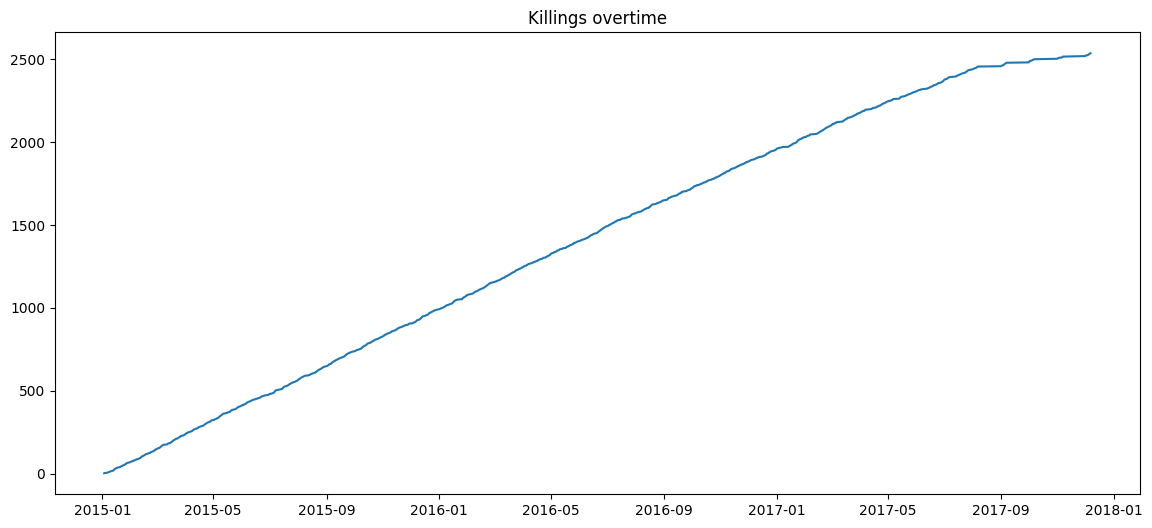

In [199]:
plt.figure(figsize=(14,6))
plt.title('Killings overtime')
plt.plot(killings_by_date)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).